In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

/home/keanu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Helper Libraries 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.8.0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = \
fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [7]:
class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat',\
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

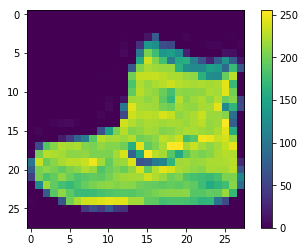

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

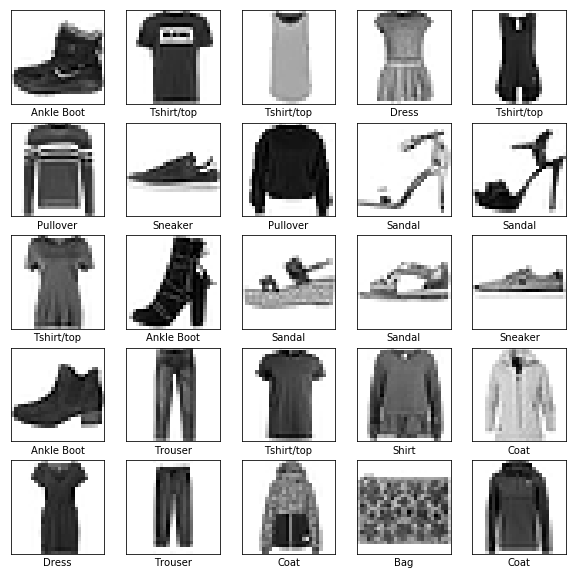

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.4961 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3691 - acc: 0.8657
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3335 - acc: 0.8782
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3122 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2943 - acc: 0.8911


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ',test_acc)

10000/10000 [==============================] - 0s 29us/step
Test accuracy:  0.8697


In [22]:
predictions = model.predict(test_images)
predictions[0]

array([7.3251191e-05, 4.6116472e-08, 1.6076816e-06, 1.0823970e-07,
       6.6796861e-07, 3.6996223e-03, 3.7845666e-06, 2.5012577e-02,
       1.5429056e-05, 9.7119290e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = \
    predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],\
                                        100*np.max(predictions_array),\
                                        class_names[true_label]),\
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

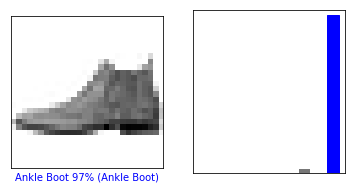

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

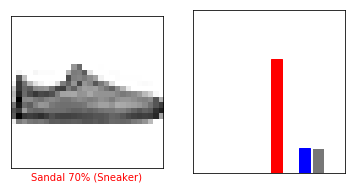

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()